In [ ]:
# Import necessary libraries
import os
import numpy as np
import matplotlib.pyplot as plt
from glob import glob
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import joblib

# Set image size and dataset path
IMAGE_SIZE = (224, 224)
dataset_path = '../Datasets/plantvillage dataset/color/'
potato_classes = ['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

# Load images and labels
X, y = [], []
for label in potato_classes:
    folder = os.path.join(dataset_path, label)
    for file in os.listdir(folder):
        img_path = os.path.join(folder, file)
        img = load_img(img_path, target_size=IMAGE_SIZE)
        img_array = img_to_array(img) / 255.0
        X.append(img_array)
        y.append(label)

In [2]:
X = np.array(X)
y = np.array(y)

# Flatten images for classical ML
X_flat = X.reshape(len(X), -1)

# Encode labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_flat, y_encoded, test_size=0.2, random_state=42)

# Train Random Forest
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [3]:
# Predict and evaluate
y_pred = rf_clf.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {acc * 100:.2f}%")

Test Accuracy: 83.99%


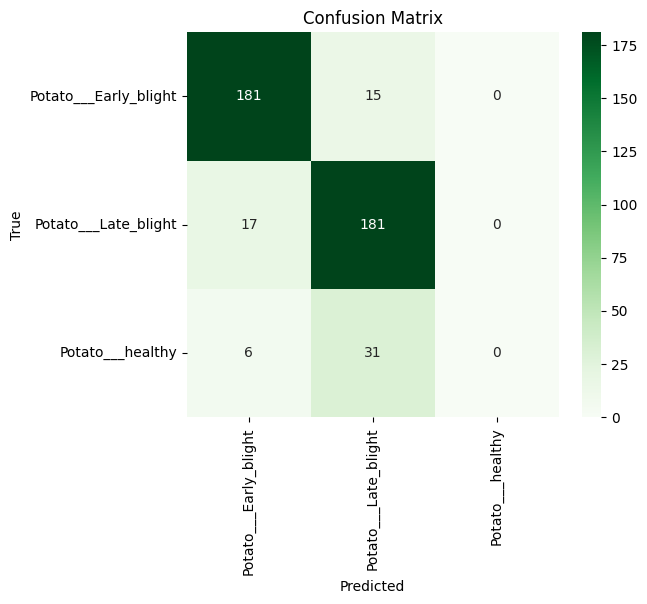

In [4]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [5]:
# Classification report
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=le.classes_))

Classification Report:
                        precision    recall  f1-score   support

Potato___Early_blight       0.89      0.92      0.91       196
 Potato___Late_blight       0.80      0.91      0.85       198
     Potato___healthy       0.00      0.00      0.00        37

             accuracy                           0.84       431
            macro avg       0.56      0.61      0.59       431
         weighted avg       0.77      0.84      0.80       431



d:\Coding arena\python_codes\plant_disease\plant_env\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\Coding arena\python_codes\plant_disease\plant_env\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\Coding arena\python_codes\plant_disease\plant_env\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

In [6]:
# Save model and label encoder
joblib.dump(rf_clf, '../Models/potato_random_forest_model.pkl')
joblib.dump(le, '../Models/potato_label_encoder.pkl')

['../Models/potato_label_encoder.pkl']